<a href="https://colab.research.google.com/github/jamslaugh/tacotron2_thesis/blob/master/Tacotron2_data_munging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import re
import os
import seaborn as sns
import sys
import IPython.display as ipd
#from scipy.signal import resample #things tried not working
#import samplerate #things tried not working

# Wav files!

~~**IMP: TODO:** da capire perchè phr341 da un bug~~

da provare, metti ehm con khm...

In [ ]:
os.getcwd()

def wav_reader(int_min = 15650,int_max = 30616,filename = 'G01V01P02.wav',out_name = 'prova.wav',filepath='Data EAF\\materials\\G01\\V01',out_path='Data EAF\\materials\\G01\\training_data\\wavs'):
    file_name = os.path.join('.',*filepath.split(os.path.sep),filename)
    audio_data = wavfile.read(file_name)
    phrase = audio_data[1]
    rate = audio_data[0]
    time = np.arange(1.,phrase.shape[0]/rate*1000+1,1/(rate/1000)) 
    out_file = os.path.join(*out_path.split(os.path.sep),out_name)
    try:
        
        upper_bound = np.argmax(time[np.logical_and(time >= 0, time <= int_max)])
        if int_min > 0:
            lower_bound = np.argmax(time[np.logical_and(time >= 0, time <= int_min)])
        else:
            lower_bound = np.argmax(time[0])
    except:
        raise Exception(f"{sys.exc_info()[1]}\nTime array is:\t{time};\nint_min is:\t{int_min}\nint_max is:\t{int_max}\nlogical_and_upper:\t{np.logical_and(time >= 0, time <= int_max)}\nlogical_and_lower:\t{np.logical_and(time >= 0, time <= int_min)}")
    if upper_bound + 1 < phrase.size:
        sub_phrase = phrase[lower_bound:upper_bound+1]
    else:
        sub_phrase = phrase[lower_bound:]
    time_sub = np.arange(1.,sub_phrase.shape[0]/rate*1000+1,1/(rate/1000))
    wavfile.write(out_file,rate,sub_phrase) #phrase[np.argmax(time[np.logical_and(time >= 0, time <= int_min-200)]):np.argmax(time[np.logical_and(time >= 0, time <= int_max+100)])])
    return time_sub
#wavfile.write('prova.wav',rate,phrase[int((100+2)*44.12197646337256):int((15650+2)*44.12197646337256)])

In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/preprocessing_results_full_disfl/trial.csv') # cambia con '/content/drive/Othercomputers/My Laptop/preprocessing_results/trial.csv'
filepath = '/drive/Othercomputers/My Laptop/Data EAF/materials/G01/data_ready'
outpath = './drive/Othercomputers/My Laptop/Data EAF/materials/G01/training_data_full/wavs' # cambia con './drive/Othercomputers/My Laptop/Data EAF/materials/G01/training_data_full/wavs'
#%debug

#df = df.drop(df[df.ORT.str.match('\<.*\>')].index)

In [ ]:
df.ORT = df.ORT.str.strip()
df.ORT = df.ORT.replace({
                         "<INT>":'nkt',
                         "<silence>":'nkt',
                         "<inspiration>":'nspk',
                         "<inspiratioin>":'nspk',
                         "<inspiraiton>":'nspk',
                         "<tongue-click>":'clk',
                         "<tongue click>":'clk',
                         "<tongune-click>":'clk',
                         "<tongue cilk>":'clk',
                         "<tongue clcik>":'clk',
                         "<breath>":'nspk',
                         "<cough>":'cgh',
                         '<laugh>':'lhj',
                         '<laughter>':'lhj',
                         '<laugher>':'lhj',
                         "<aa>":"aa",
                         "<vocal>":"vck",
                         "<noise>":"njs",
                         "<NOISE>":'njs',
                         "<unclear>":"nck",
                         "<unclear+> /":"nck",
                         "<aa>avveniva":"avveniva",
                         "<ff>finge":'finge',
                         "<ll>la":"la",
                         "<nn>non":"non",
                         "<dd>dove":"dove",
                         "<ehm>m":'khm',
                         "<eeh>":'khm',
                         "<ehm>":'khm',
                         "<ehm> ":"khm",
                         "<mhh>":'khm',
                         "<mh>":'khm',
                         "<eeh>":"hh",
                         "<sp>":"hh",
                         "<lp>":"hh",
                         "<lP>":"hh",
                         "<P>":"hh",
                         "<eh>":"hh",
                         "<sè>":"sè",
                         "<uu>un":"un",
                         "<eeh> ":"ehm",
                         "<<sp>" : "hh",
                         "<ah>" : "ehm",
                         })

In [ ]:
df = df.dropna(subset=['ANNOTATION_ID_phr','phr','End Time_phr','Nr_phr'],how='all')

In [ ]:
df[df.ORT.str.match('<.*>')].ORT.unique()

array([], dtype=object)

In [ ]:
df = df.drop(df[df.ORT.str.match('\<.*\>')].index)

In [ ]:
df = df[df.phr!='placeholder']

In [ ]:
pd.set_option("display.max_rows", 999)

In [ ]:
#df.phr = df.phr.fillna(df.wav_reference.str.replace('.wav','') + df.ANNOTATION_ID_phr )

In [ ]:
#df.phr

In [ ]:
df.phr = df.wav_reference.str.replace('.wav','') + df.Nr_phr.astype('int').astype('str')

In [ ]:
for phr in df.phr.unique():
    df.loc[df.phr == phr,'sent_time'] = df.loc[df.phr == phr,'End Time_phr'] - df.loc[df.phr == phr,'Begin Time'].min()

In [ ]:
# df.ORT = df.ORT.str.replace('\w+\d+','unk')

In [ ]:
df['quantiles'] = pd.cut(df.sent_time,5,labels=['first','second','third','fourth','fifth'])

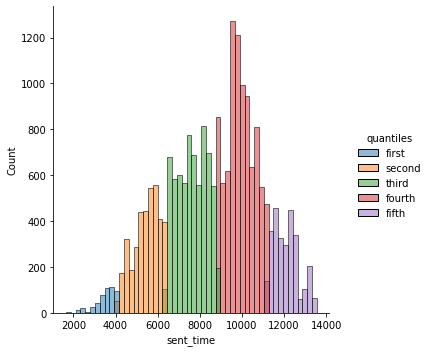

In [ ]:
sns.displot(data=df,x='sent_time',hue='quantiles')

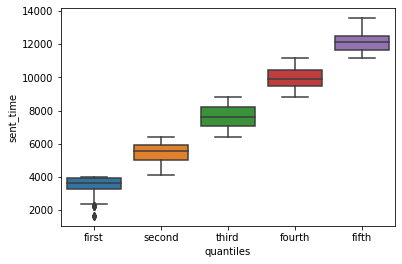

In [ ]:
sns.boxplot(y='sent_time',x='quantiles',data=df)

In [ ]:
df.loc[(df.phr=='G01V01P0164')&(df['Begin Time']>605600),'phr'] = df.loc[(df.phr=='G01V01P0164')&(df['Begin Time']>605600),'phr'] + 'b'

In [ ]:
written_annot = []
for phr in df.phr.unique():
    phrase_start = df.loc[df.phr==phr,'Begin Time'].min()
    phrase_end = df.loc[df.phr==phr,'End Time'].max()
    input_file = df.loc[df.phr==phr,'wav_reference'].iloc[0]
    out_file_name = phr + '.wav'
    time_sub = wav_reader(phrase_start,phrase_end,input_file,out_file_name,filepath=filepath,out_path=outpath)
    sent_dur = phrase_end - phrase_start
    written_annot.append('wavs/' + phr + '.wav'+'|'+' '.join(df.loc[df.phr==phr,'ORT'].to_list()))
    if time_sub.max() > df.sent_time.mean() + 2*df.sent_time.std():
        print(f"Phrase Start:\t{phrase_start}\nPhrase end:\t{phrase_end}\nPhrase code:\t{phr}\nDuration:\t{sent_dur/1000} seconds\nFile:\t{df.loc[df.phr==phr,'wav_reference'].values[0]}\n\n")
written_annot = [el.encode("utf8") for el in written_annot]

written_annot = [el.decode() for el in written_annot]

Phrase Start:	50420
Phrase end:	63580
Phrase code:	G01V02P016
Duration:	13.16 seconds
File:	G01V02P01.wav


Phrase Start:	287662
Phrase end:	300930
Phrase code:	G01V03P0132
Duration:	13.268 seconds
File:	G01V03P01.wav


Phrase Start:	521632
Phrase end:	534790
Phrase code:	G01V03P0159
Duration:	13.158 seconds
File:	G01V03P01.wav


Phrase Start:	401550
Phrase end:	414706
Phrase code:	G01V03P0248
Duration:	13.156 seconds
File:	G01V03P02.wav


Phrase Start:	121560
Phrase end:	135040
Phrase code:	G01V03P0416
Duration:	13.48 seconds
File:	G01V03P04.wav


Phrase Start:	182000
Phrase end:	195564
Phrase code:	G01V03P0422
Duration:	13.564 seconds
File:	G01V03P04.wav


Phrase Start:	30780
Phrase end:	43990
Phrase code:	G01V03P054
Duration:	13.21 seconds
File:	G01V03P05.wav




In [ ]:
df_all = pd.DataFrame([{'file':el.split('|')[0],'text':el.split('|')[1]} for el in written_annot])
df_all.text = df_all.text + '.'
df_all.text = df_all.text.str.lower()

In [ ]:
df_all.to_csv('/content/drive/Othercomputers/My Laptop/Data EAF/materials/G01/training_data_full/training_data.txt',sep='|',index=False,header=False,encoding='utf-8')

#Train Test split

In [ ]:
data_new = pd.read_csv('/content/drive/Othercomputers/My Laptop/LJSpeech-1.1/metadata.csv',header=None,sep='|',names = ['file','text','norm_text'])

In [ ]:
data_new.file = 'wavs/' + data_new.file + '.wav'

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(data_new[['file','text']],test_size=0.1)

In [ ]:
x_train.to_csv('/content/drive/Othercomputers/My Laptop/LJSpeech-1.1/data_train.txt',sep='|',index=False,header=False,encoding='utf-8')
x_test.to_csv('/content/drive/Othercomputers/My Laptop/LJSpeech-1.1/data_test.txt',sep='|',index=False,header=False,encoding='utf-8')

# Metadata Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.io import wavfile
import os
import IPython.display as ipd

In [ ]:
def timing_data(outpath):
    wav_data = []
    for el in os.listdir(outpath):
        rate, mel = wavfile.read(outpath + '/' + el)
        time = np.arange(1.,mel.shape[0]/rate*1000+1,1/(rate/1000))
        wav_data.append({'file':el,'time':time.max()})
    df = pd.DataFrame(wav_data)
    return df

In [ ]:
outpath = './drive/Othercomputers/My Laptop/Data EAF/materials/G01/training_data_full/wavs'
wav_data = timing_data(outpath)

In [ ]:
wav_data['phr'] = wav_data.file.str.replace('(G01V\d{2}P\d{2}.*)(.wav)','\g<1>')

In [ ]:
transcr_data = pd.read_csv('/content/drive/Othercomputers/My Laptop/preprocessing_results_full_disfl/trial.csv')

In [ ]:
for phr in transcr_data.phr.unique():
    transcr_data.loc[transcr_data.phr == phr,'sent_time'] = transcr_data.loc[transcr_data.phr == phr,'End Time_phr'] - transcr_data.loc[transcr_data.phr == phr,'Begin Time'].min()

In [ ]:
train_data = pd.read_csv("/content/drive/Othercomputers/My Laptop/Data EAF/materials/G01/training_data_full/training_data.txt",header = None, sep='|',names = ['file','text'])

In [ ]:
train_data['file'] = train_data['file'].str.replace('wavs/','')

all_wav = pd.merge(train_data,wav_data)
all_wav['text_length'] = all_wav.text.apply(lambda x: len(x.split()))

In [ ]:
all_wav['origin'] = all_wav.file.str.replace("(G\d{2}V\d{2}P\d{2})(.*)","\g<1>")

In [ ]:
orig_len = pd.concat([transcr_data.groupby('wav_reference')['End Time'].max(),transcr_data.groupby('wav_reference')['ORT'].count()],axis=1)

In [ ]:
orig_len = orig_len.reset_index()
orig_len['wav_reference'] = orig_len.wav_reference.str.replace('.wav','')
orig_len.columns = ['origin','time','orig_nwords']

In [ ]:
all_wav = all_wav.merge(orig_len.reset_index(),on='origin')

In [ ]:
all_wav.rename({'time_x':'sent_time','time_y':'orig_time'},axis=1,inplace=True)

In [ ]:
all_wav['orig_bucket'] = pd.qcut(all_wav.orig_time,[0,.25,.5,.75,1],labels=['first','second','third','fourth'])
all_wav['sent_bucket'] = pd.qcut(all_wav.sent_time,[0,.25,.50,.75,1],labels=['first','second','third','fourth'])

In [ ]:
transcr_data['quantiles'] = pd.cut(transcr_data.sent_time,5,labels=['first','second','third','fourth','fifth'])

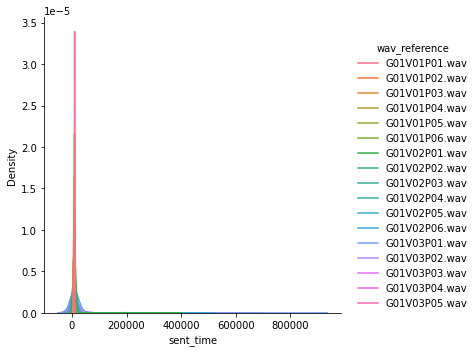

In [ ]:
sns.displot(transcr_data,x='sent_time',hue='wav_reference',kind='kde')

In [ ]:
all_wav = all_wav.drop('index',axis=1)

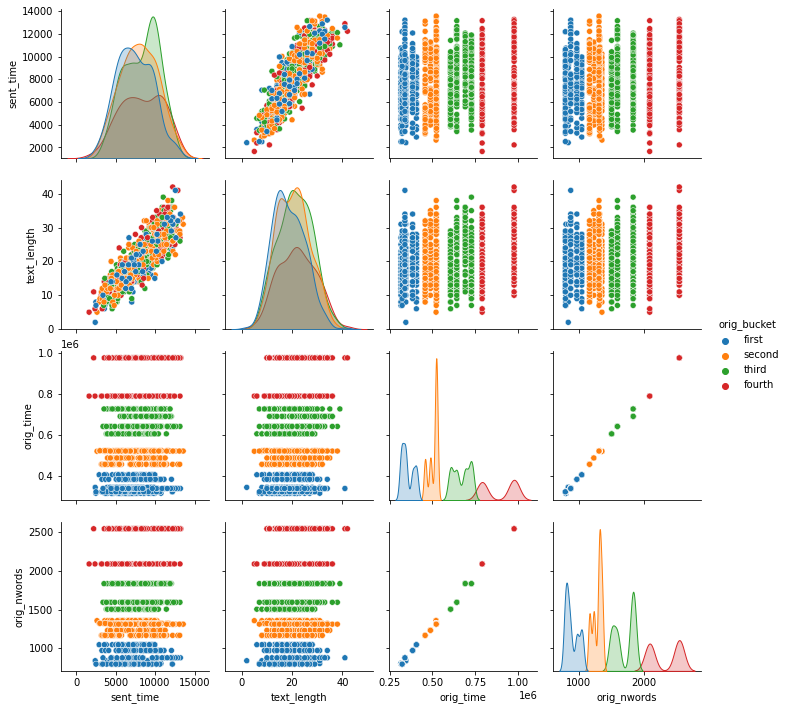

In [ ]:
# g = sns.FacetGrid(all_wav,row = 'sent_bucket',hue='origin')
# g.map_dataframe(sns.jointplot,x = 'sent_time',y = 'text_length')
sns.pairplot(all_wav,hue='orig_bucket',diag_kind='kde')

In [ ]:
all_wav.orig_bucket.value_counts()

third     317
second    309
first     284
fourth    206
Name: orig_bucket, dtype: int64

In [ ]:
all_wav.sent_bucket.value_counts()

third     280
second    279
first     279
fourth    278
Name: sent_bucket, dtype: int64

In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/preprocessing_results_full_disfl/trial.csv')

In [ ]:
df_2 = df.drop(df[df.ORT.str.match(r'\<[a-z]+\>')].index).reset_index(drop=True)

In [ ]:
duration_data = []
df_2 = df_2.dropna()
for phr in df_2.phr.unique():
    duration_data.append({'file':df_2.loc[df_2.phr == phr,'wav_reference'].iloc[0],'phrase':phr,'duration':df_2.loc[df_2.phr == phr,'End Time'].max() - df_2.loc[df_2.phr == phr,'Begin Time'].min()})

In [ ]:
duration_data = pd.DataFrame(duration_data)

In [ ]:
transcr_data.phr = transcr_data.wav_reference.str.replace('.wav','') + transcr_data.phr.astype('str') + transcr_data.Nr_phr.astype('str')

In [ ]:
transcr_data.ORT = transcr_data.ORT.replace({
                         "<INT>":'<nkt>' #'nkt'
                         ,"<silence>":'<nkt>' #'nkt'
                         ,"<inspiration>":'<nspk>' #'nspk'
                         ,"<inspiratioin>":'<nspk>' #'nspk'
                         ,"<inspiraiton>":'<nspk>' #'nspk'
                         ,"<tongue-click>":'<clk>' #'clk'
                         ,"<tongue click>":'<clk>' #'clk'
                         ,"<tongune-click>":'<clk>' #'clk'
                         ,"<tongue cilk>":'<clk>' #'clk'
                         ,"<tongue clcik>":'<clk>' #'clk'
                         ,"<breath>":'<nspk>' #'nspk'
                         ,"<cough>":'<cgh>' #'cgh'
                         ,'<laugh>':'<lhj>' #'lhj'
                         ,'<laughter>':'<lhj>' #'lhj'
                         ,'<laugher>':'<lhj>' #'lhj'
                         ,"<aa>":"aa" #"aa"
                         ,"<vocal>":"<vck>" #"vck"
                         ,"<noise>":"<njs>" #"njs"
                         ,"<NOISE>":'<njs>' #'njs'
                         ,"<unclear>":"<nck>" #"nck"
                         ,"<unclear+> /":"<nck>" #"nck"
                         ,"<aa>avveniva":"avveniva" #"avveniva"
                         ,"<ff>finge":'finge' #'finge'
                         ,"<ll>la":"la" #"la"
                         ,"<nn>non":"non" #"non"
                         ,"<dd>dove":"dove" #"dove"
                         ,"<ehm>m":'<ehm>' #'ehm'
                         ,"<eeh>":'<ehm>' #'ehm'
                         ,"<ehm>":'<ehm>' #'ehm'
                         ,"<ehm> ":"<ehm>" #"ehm"
                         ,"<mhh>":'<ehm>' #'ehm'
                         ,"<mh>":'<ehm>' #'ehm'
                         ,"<eeh>":"<hh>" #"hh"
                         ,"<sp>":"<hh>" #"hh"
                         ,"<lp>":"<hh>" #"hh"
                         ,"<lP>":"<hh>" #"hh"
                         ,"<P>":"<hh>" #"hh"
                         ,"<eh>":"<hh>" #"hh"
                         ,"<sè>":"sè" #"sè"
                         ,"<uu>un":"un" #"un"
                         ,"<eeh> ":"<ehm>" #"ehm"
                         ,"<<sp>" : "<hh>" #"hh"
                         ,"<ah>" : "<ehm>" #"ehm"
                         })

In [ ]:
import seaborn as sns

Text(0, 0.5, 'Count')

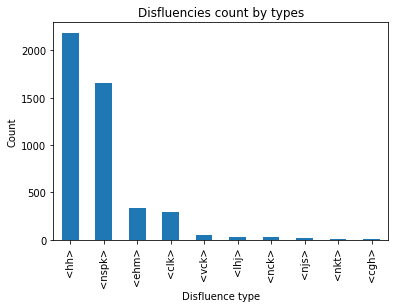

In [ ]:
import matplotlib.pyplot as plt
plt.figure()#figsize=(15,20))
transcr_data.loc[transcr_data.ORT.str.match('\<.*\>'),'ORT'].value_counts().plot(kind='bar')
plt.title("Disfluencies count by types")
plt.xlabel("Disfluence type")
plt.ylabel("Count")

In [ ]:
transcr_data.loc[transcr_data.ORT.str.match('\<.*\>'),:].groupby(['ORT'])['Duration'].sum().sort_values(ascending=False)/1000

ORT
<hh>      879.844
<nspk>    648.066
<ehm>     270.585
<clk>      45.220
<vck>      12.543
<lhj>      10.164
<nck>       9.501
<njs>       6.628
<nkt>       6.266
<cgh>       1.724
Name: Duration, dtype: float64

Text(0, 0.5, 'Cumulated Seconds')

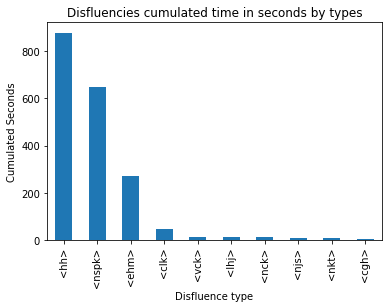

In [ ]:
plt.figure()
(transcr_data.loc[transcr_data.ORT.str.match('\<.*\>'),:].groupby(['ORT'])['Duration'].sum().sort_values(ascending=False)/1000).plot(kind='bar')
plt.title("Disfluencies cumulated time in seconds by types")
plt.xlabel("Disfluence type")
plt.ylabel("Cumulated Seconds")

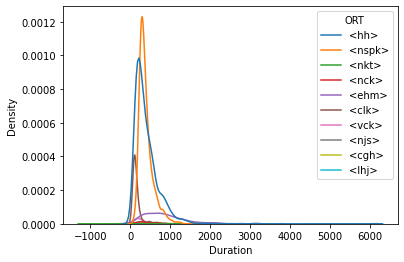

In [ ]:
sns.kdeplot('Duration',hue='ORT',data = transcr_data.loc[transcr_data.ORT.str.match('\<.*\>'),:])

In [ ]:
samples = all_wav.sample(n=10,replace=False)
for i,sample in samples.iterrows():
    audio = wavfile.read(outpath + '/' + sample['file'])
    print()
    ipd.display(ipd.Audio(audio[1],rate = audio[0]))
    print()
    print(f"Phrase No. {sample['phr']}")
    print(sample['text'])


Phrase No. G01V03P019
nspk la certosa hh di san martino viene hh iden+ iii+/ come dire hh clk individuata hh clk come sede ideale nspk per farne un museo.




Phrase No. G01V02P0520
questo è proprio l'intento nspk hh del meraviglioso e dell'illusione che spesso e volentieri pittori nspk barocchi hh khm del barocco intendono intendono darci.




Phrase No. G01V02P0439
qui c'è hh san domenico nspk qui c'è san bruno nspk e così via nspk quindi tutti i fond+ san benedetto e quant'altro quindi tutti i fondatori di ordini monastici.




Phrase No. G01V03P0433
quindi niente che abbia a che fare con le faccende pratiche di cui hh vi dicevo hh si occupavano hh altreee altre persone altre nspk altre figure ecco.




Phrase No. G01V03P0515
nspk e proprio perché hh c'era questa attenzione particolare khm al canto.




Phrase No. G01V01P052
quindi ci troviamo nspk all'interno del coro nspk ancoraaa una volta circondato da hh stalli dove per l'appunto prendevano posto nspk.




Phrase No. G01V03P0438
però quello che più ci interessa o mi interessa segnalarvi nspk è quello che c'è negli altri registri hh cioè sp> nelle lunette e ciò che c'è sopra le lunette.




Phrase No. G01V01P0139
qui per esempio c'è belisario corenzio giovanni baglione ma nspk khm se khm guardate nspk per quanto possibile nspk khm.




Phrase No. G01V02P0322
nspk khm clk quelle sette stelle non sono nient'altro che san bruno e i suoi compagni nspk.




Phrase No. G01V03P0316
passando il di fatto la maggior parte del tempo all'interno della cella si sta soli.


In [ ]:
df_all.shape

(1116, 2)

In [ ]:
def make_lags(x, times=7,seq_col='ORT'):

    shifted_sequences = [x[seq_col].shift(periods = i) for i in list(range(times+1))[::-1]]
    shifted_sequences = pd.concat(shifted_sequences,axis=1)
    shifted_sequences.columns = [seq_col + str(i) for i in list(range(times+1))[::-1]]

    return shifted_sequences

def disfl_seq(x,times=7,seq_col='ORT',regexpr = '\<.*\>'):

    data = make_lags(x,times,seq_col)
    actual_match = data[seq_col + '0'].str.match(regexpr)
    cols = []
    data['lag0_disfl'] = actual_match
    for k in range(1,times+1):
        actual_match &= data[seq_col + str(k)].str.match(regexpr)
        data['lag{}_disfl'.format(k)] = actual_match

    return data

def disfl_concat(df,times = 7, seq_col = 'ORT'):
    
    for k in range(1, times + 1):
        df['lag{}_type'.format(k)] = df.loc[df['lag{}_disfl'.format(k)], 
                                           seq_col + '{}'.format(k)].str.cat(df.loc[df['lag{}_disfl'.format(k)], 
                                                                                    seq_col + '{}'.format(k-1):seq_col+'0'], 
                                                                             sep= ' ', 
                                                                             na_rep = '')
    return df

In [ ]:
disfl_dataframe = disfl_seq(transcr_data)

In [ ]:
disfl_dataframe_1 = disfl_concat(disfl_dataframe)

In [ ]:
disfl_dataframe_1.head()

ORT7 ORT6 ORT5        ORT4  ... lag4_type lag5_type lag6_type lag7_type
0  NaN  NaN  NaN         NaN  ...       NaN       NaN       NaN       NaN
1  NaN  NaN  NaN         NaN  ...       NaN       NaN       NaN       NaN
2  NaN  NaN  NaN         NaN  ...       NaN       NaN       NaN       NaN
3  NaN  NaN  NaN         NaN  ...       NaN       NaN       NaN       NaN
4  NaN  NaN  NaN  Buongiorno  ...       NaN       NaN       NaN       NaN

[5 rows x 23 columns]

In [ ]:
# da vedere con sns.catplot, sns.relplot che tipi di grafici escono.

array([0, 1, 2, 3, 4, 5, 6])

> <ipython-input-210-89757e7d6574>(18)plot_data()
     16 
     17         for i in range(1,times):
---> 18             ax[i,0].bar(df.loc[df['lag{}_disfl'.format(i)],'lag{}_type'.format(i)].value_counts().index,
     19                     df.loc[df['lag{}_disfl'.format(i)],'lag{}_type'.format(i)].value_counts()/ df.loc[df['lag{}_disfl'.format(i)],'lag{}_type'.format(i)].value_counts().sum())
     20             ax[i,0].set_xticklabels(df.loc[df['lag{}_disfl'.format(i)],'lag{}_type'.format(i)].value_counts().index, rotation=45, ha = 'right')

ipdb> down
*** Newest frame
ipdb> up
> <ipython-input-211-ba5f699d44e8>(1)<module>()
----> 1 plot_data(disfl_dataframe_1)

ipdb> up
*** Oldest frame
ipdb> down
> <ipython-input-210-89757e7d6574>(18)plot_data()
     16 
     17         for i in range(1,times):
---> 18             ax[i,0].bar(df.loc[df['lag{}_disfl'.format(i)],'lag{}_type'.format(i)].value_counts().index,
     19                     df.loc[df['lag{}_disfl'.format(i)],'lag{}_type'.f

IndexError: ignored

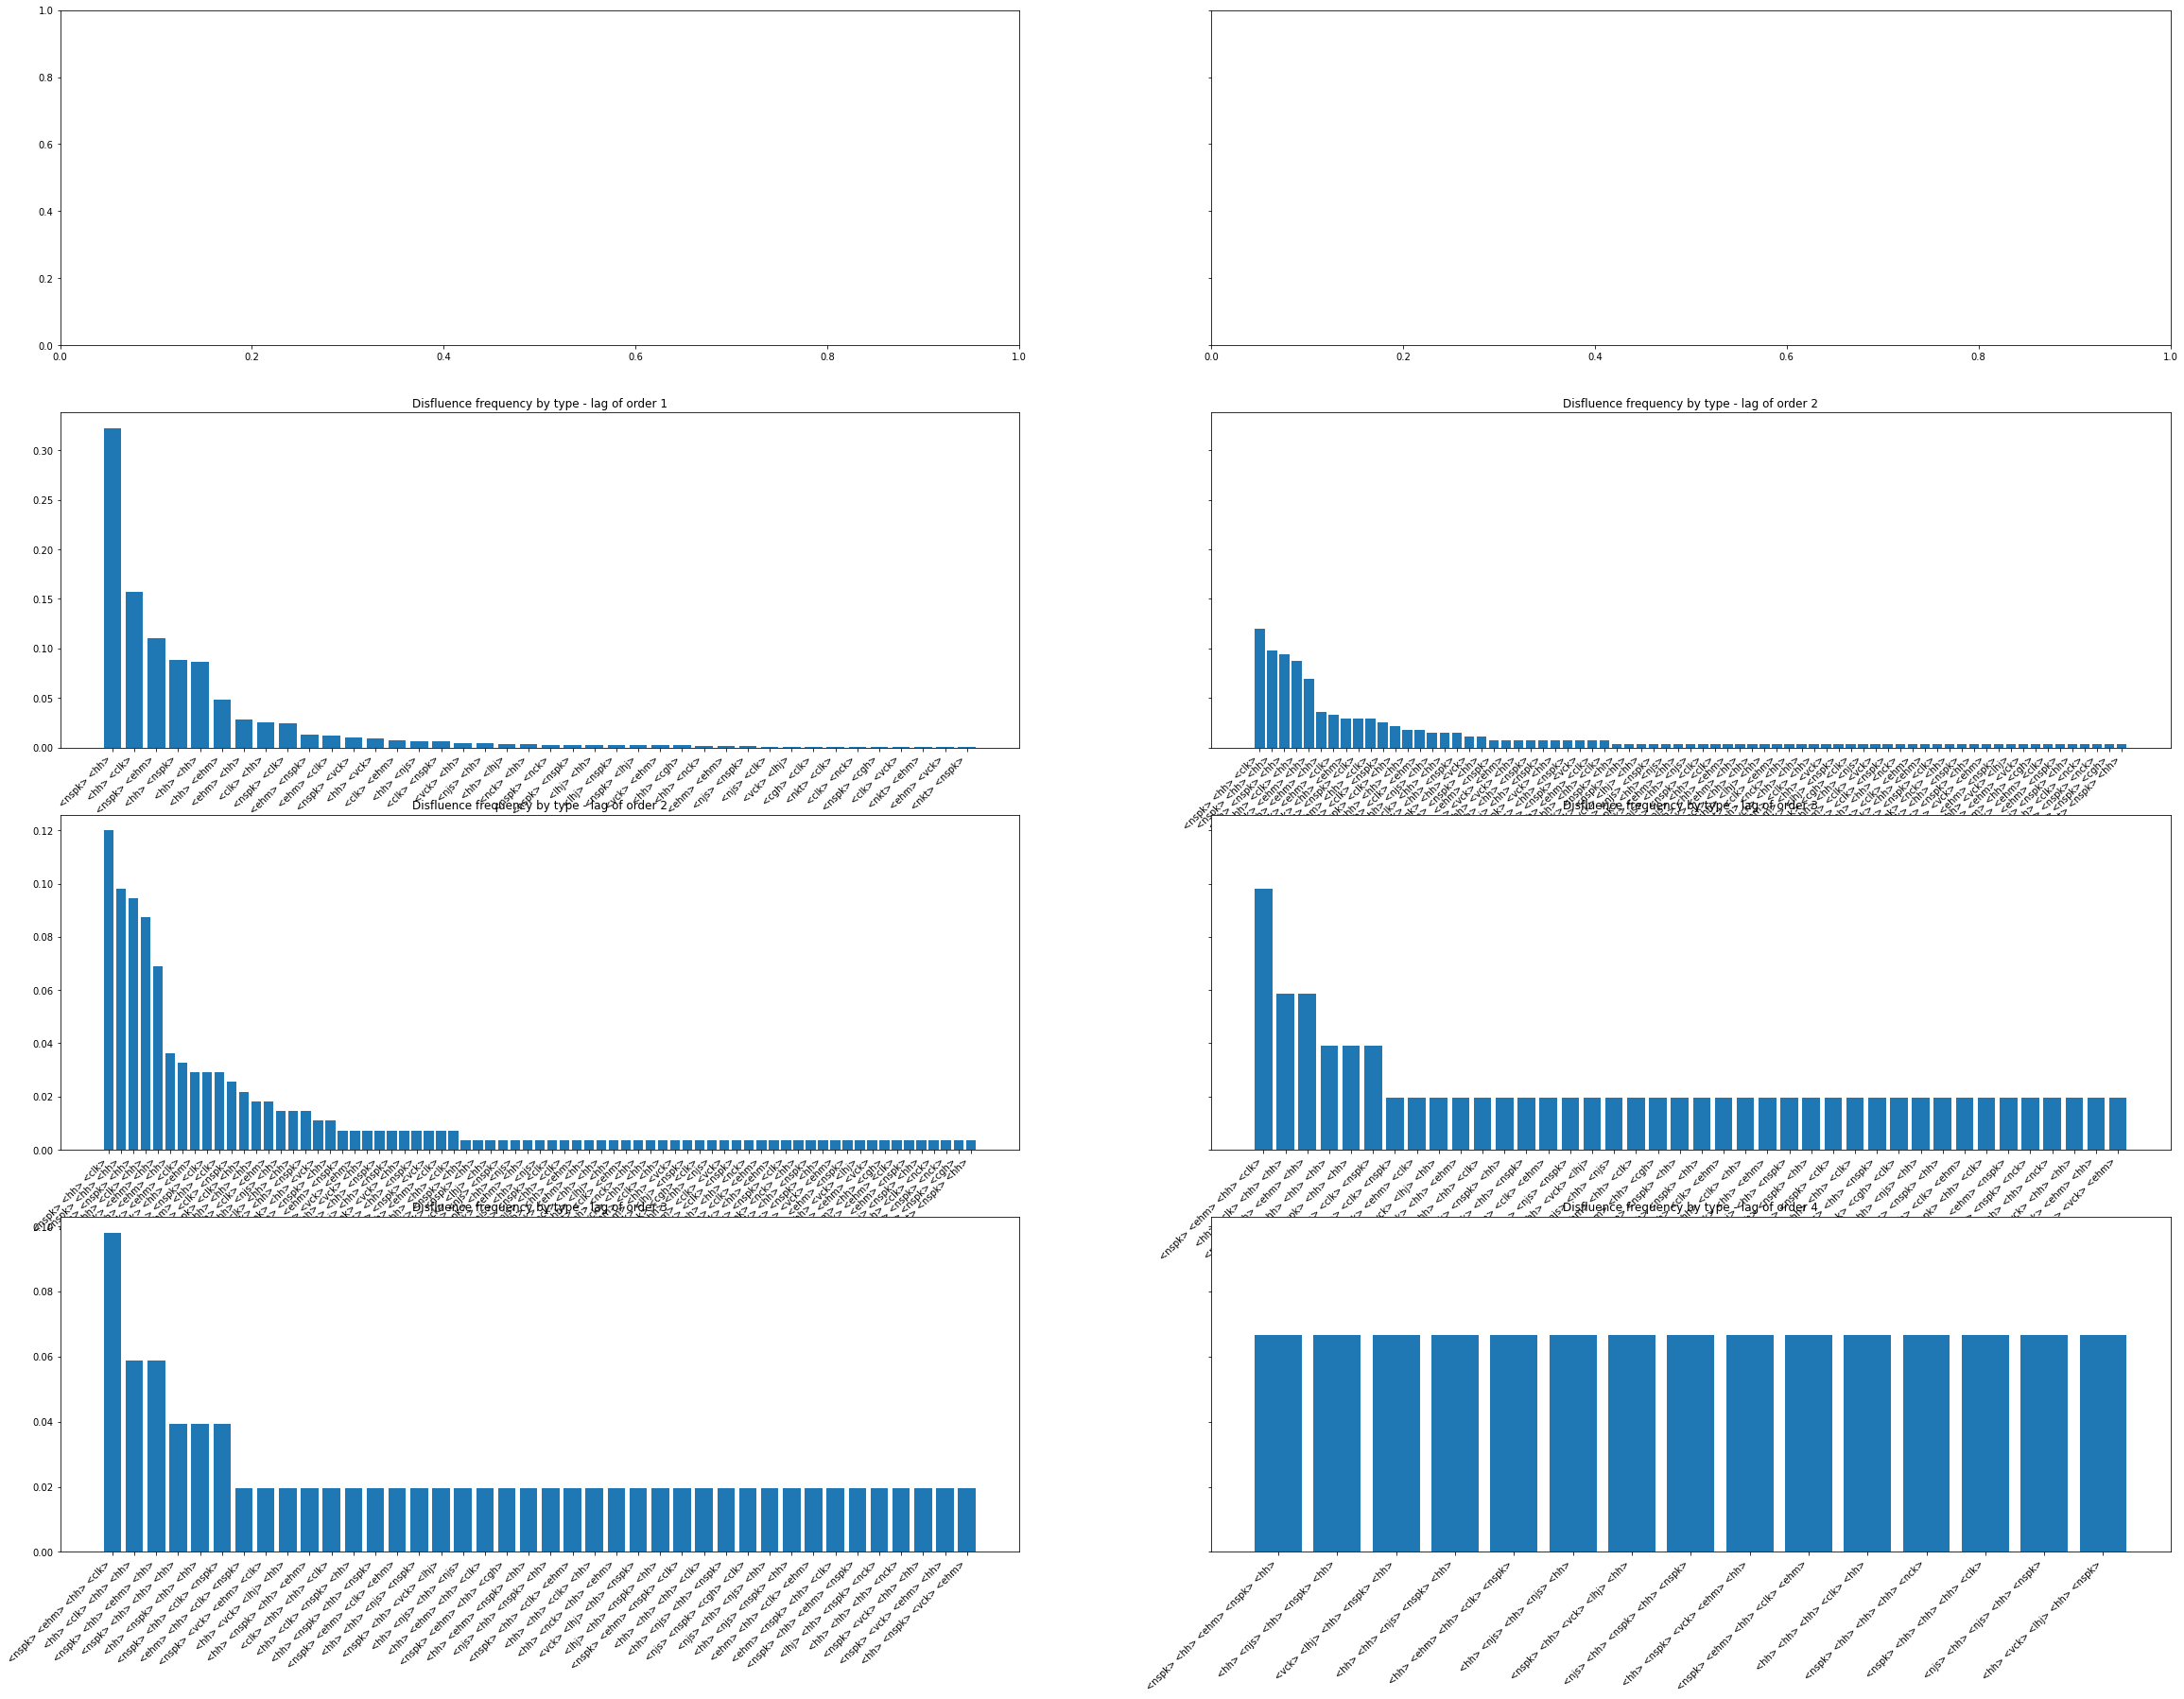

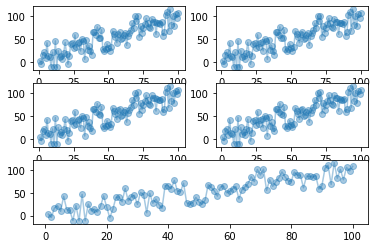

In [ ]:
df=pd.DataFrame({'x_values': range(1,101), 'y_values': np.random.randn(100)*15+range(1,101), 'z_values': (np.random.randn(100)*15+range(1,101))*2 })

# Plot 1
for i in range(3 - 1):
    for j in range(2):
        ax1 = plt.subplot2grid((3, 2), (i, j), colspan=1)
        ax1.plot( 'x_values', 'y_values', data=df, marker='o', alpha=0.4)
ax2 = plt.subplot2grid((3,2),(list(range(3))[-1],0),colspan = 2)
ax2.plot( 'x_values', 'y_values', data=df, marker='o', alpha=0.4)

# Show the graph
plt.show()

In [ ]:
disfl_dataframe.loc[disfl_dataframe.lag3_disfl]

ORT7         ORT6         ORT5  ... lag5_disfl lag6_disfl lag7_disfl
814          agli        inizi          del  ...      False      False      False
848             è          per       questo  ...      False      False      False
2059        entra           in       nessun  ...      False      False      False
3013           di       storia        della  ...      False      False      False
3202       allora       quindi        dalll  ...      False      False      False
3302   finalmente      appunto      parlare  ...      False      False      False
3303      appunto      parlare       minimo  ...      False      False      False
3304      parlare       minimo       <nspk>  ...       True      False      False
4190       <nspk>            i     conversi  ...      False      False      False
5104       questa        sorta         diii  ...      False      False      False
5295       potete       vedere       <nspk>  ...      False      False      False
6231       <nspk>         <hh>        <clk>  ...      False      False      False
6232         <hh>        <clk>      domanda  ...      False      False      False
6233        <clk>      domanda       <nspk>  ...       True      False      False
6234      domanda       <nspk>         <hh>  ...       True       True      False
7480       <nspk>          può         <hh>  ...      False      False      False
7921       Napoli           ma            i  ...      False      False      False
7922           ma            i     francesi  ...      False      False      False
8701         sono       conse+   conservate  ...      False      False      False
8702       conse+   conservate  all'interno  ...      False      False      False
9145          per       quanto           ne  ...      False      False      False
9536          qui           un         poco  ...      False      False      False
12086          di      andarli            a  ...      False      False      False
12324      tratta        tutti       quanti  ...      False      False      False
12325       tutti       quanti           di  ...      False      False      False
12595       bassa         <hh>         però  ...      False      False      False
12712          in       realtà       dovete  ...      False      False      False
13245      chiesa        delle        donne  ...      False      False      False
14645      <nspk>        <ehm>           di  ...      False      False      False
14658        <hh>          tra            i  ...      False      False      False
15068      <nspk>       grande         <hh>  ...      False      False      False
15069      grande         <hh>        opera  ...      False      False      False
15209    realizza     questooo       questo  ...      False      False      False
15210    questooo       questo     affresco  ...      False      False      False
16284       viene            a     lavorare  ...      False      False      False
16686       <ehm>        <clk>          del  ...      False      False      False
17196       delle  limitazioni          che  ...      False      False      False
17570    distanza           vi        sfido  ...      False      False      False
17571          vi        sfido            a  ...      False      False      False
17603        però         così            a  ...      False      False      False
17604        così            a       occhio  ...      False      False      False
17605           a       occhio         <hh>  ...       True      False      False
17606      occhio         <hh>        <njs>  ...       True       True      False
17607        <hh>        <njs>         <hh>  ...       True       True       True
17660    l'altare          èee           di  ...      False      False      False
18577   parlavamo        <clk>         poco  ...      False      False      False
19886          d+         dove          era  ...      False      False      False
20753          ai         suoi     desideri  ...      False      False      F

In [ ]:
disfl_dataframe.loc[:,'lag0_disfl':].sum(axis=0)

lag0_disfl    4604
lag1_disfl    1362
lag2_disfl     275
lag3_disfl      51
lag4_disfl      15
lag5_disfl       6
lag6_disfl       3
lag7_disfl       1
dtype: int64

In [ ]:
disfl_dataframe.loc[disfl_dataframe.lag3_disfl,'ORT3'].str.cat(disfl_dataframe.loc[disfl_dataframe.lag3_disfl,'ORT2':'ORT0'], sep= ' ',na_rep = '').value_counts()

<nspk> <ehm> <hh> <clk>      5
<hh> <clk> <hh> <hh>         3
<nspk> <hh> <ehm> <hh>       3
<nspk> <hh> <hh> <hh>        2
<hh> <nspk> <hh> <hh>        2
<nspk> <hh> <clk> <nspk>     2
<ehm> <hh> <clk> <nspk>      1
<nspk> <vck> <ehm> <clk>     1
<hh> <vck> <lhj> <hh>        1
<hh> <nspk> <hh> <ehm>       1
<clk> <hh> <hh> <clk>        1
<hh> <clk> <nspk> <hh>       1
<hh> <nspk> <hh> <nspk>      1
<nspk> <ehm> <clk> <ehm>     1
<hh> <hh> <njs> <nspk>       1
<nspk> <hh> <vck> <lhj>      1
<hh> <njs> <hh> <njs>        1
<hh> <ehm> <hh> <clk>        1
<nspk> <ehm> <hh> <cgh>      1
<hh> <ehm> <nspk> <hh>       1
<njs> <hh> <nspk> <hh>       1
<nspk> <hh> <clk> <ehm>      1
<hh> <hh> <clk> <hh>         1
<hh> <nck> <hh> <ehm>        1
<vck> <lhj> <hh> <nspk>      1
<lhj> <hh> <nspk> <hh>       1
<nspk> <ehm> <nspk> <clk>    1
<hh> <hh> <hh> <clk>         1
<hh> <njs> <hh> <nspk>       1
<njs> <nspk> <cgh> <clk>     1
<njs> <hh> <njs> <hh>        1
<hh> <njs> <nspk> <hh>       1
<ehm> <h

In [ ]:
disfl_datafram

NameError: ignored

In [ ]:
df111 = pd.DataFrame({'foo':['a','b','c'], 'bar':[1, 2, 3], 'new':['apple', 'banana', 'pear']})

In [ ]:
cols = ['foo', 'bar', 'new']
df111['combined'] = df111[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [ ]:
df111

foo  bar     new    combined
0   a    1   apple   a_1_apple
1   b    2  banana  b_2_banana
2   c    3    pear    c_3_pear